<a href="https://colab.research.google.com/github/marcosgabrielll/Aprendizagem_de_maquinas_em_coluna_de_destilacao/blob/main/Coluna_de_destila%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/amarhaiqal/aspen-hysys-distillation-column-data

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install --upgrade gspread
# Criando conexão entre o colab e o google Sheet
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#Abrindo o arquivo
spreasheet= gc.open('Distillation Column Dataset')
#Abrindo as abas do arquivo
page=spreasheet.sheet1
#olhando os dados 
page.row_values(1)
#Escrevernaplanilha
#page.update('CELULA')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


['Time',
 'Sensor1',
 'Sensor2',
 'Sensor3',
 'Sensor4',
 'Sensor5',
 'Sensor6',
 'Sensor7',
 'Sensor8',
 'Sensor9',
 'Sensor10',
 'Sensor11',
 'Sensor12',
 'Sensor13',
 'Sensor14',
 'Sensor15',
 'MoleFractionTX',
 'MoleFractionHX']

In [3]:
dataset= pd.DataFrame(page.get_all_records())

In [4]:
dataset.head()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774,0.965784,0.034216


In [5]:
dataset.tail()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
956,28680,49.604279,100.903579,54.520579,3783.434579,6808.374579,2782.764579,1052.594579,0.054906,0.501001,0.498999,76.467579,104.034579,110.102579,66.923679,0.792092,0.964851,0.035149
957,28710,50.164408,101.465308,55.073908,3783.905308,6809.155308,2782.875308,1053.235308,0.054913,0.501001,0.498999,77.028608,104.595308,110.663308,67.484408,0.792288,0.964852,0.035148
958,28740,50.332178,101.634378,55.234278,3784.033378,6809.343378,2783.673378,1053.403378,0.054925,0.501001,0.498999,77.196878,104.763378,110.831378,67.652478,0.792515,0.964853,0.035147
959,28770,50.080385,101.384285,54.974485,3783.671285,6808.931285,2782.991285,1053.181285,0.054930,0.501001,0.498999,76.944985,104.511285,110.579285,67.400385,0.792525,0.964853,0.035147
960,28800,50.157894,101.462594,55.042694,3783.638594,6808.978594,2783.658594,1053.218594,0.054937,0.501001,0.498999,77.022694,104.588594,110.656594,67.477694,0.792530,0.964854,0.035146


In [6]:
dataset.describe()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,9.610000e+02,9.610000e+02,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,14400.000000,49.994889,101.279649,49.555769,3823.335379,6865.768293,2805.781415,1053.164047,0.055029,5.010010e-01,4.989990e-01,76.835812,104.424765,110.492765,67.313865,0.809068,0.964015,0.035985
std,8326.833132,0.292281,0.452364,6.118368,511.213381,755.410384,259.579392,4.997380,0.003787,2.221602e-16,1.110801e-16,0.334343,0.280159,0.280159,0.280159,0.161491,0.008473,0.008473
min,0.000000,48.907668,97.702103,36.812829,3004.403494,5653.363002,2134.576770,1013.589114,0.028320,5.010010e-01,4.989990e-01,75.991528,103.930595,109.998595,66.819695,0.571794,0.950885,0.022401
25%,7200.000000,49.754926,101.033896,44.564921,3408.090531,6252.664563,2601.983148,1049.884770,0.053854,5.010010e-01,4.989990e-01,76.601021,104.183922,110.251922,67.073022,0.639547,0.957287,0.028810
50%,14400.000000,50.001056,101.296977,50.455106,3722.752040,6718.275361,2756.461191,1053.220322,0.054807,5.010010e-01,4.989990e-01,76.832795,104.426582,110.494582,67.315682,0.807521,0.965902,0.034098
75%,21600.000000,50.225012,101.539019,54.766717,4450.433352,7406.035409,3111.691346,1055.451884,0.056485,5.010010e-01,4.989990e-01,77.085614,104.649155,110.717155,67.538255,0.914706,0.971190,0.042713
max,28800.000000,50.807513,103.848213,57.890626,4562.816420,7957.048708,3300.394030,1084.786368,0.084926,5.010010e-01,4.989990e-01,77.891430,104.929458,110.997458,67.818558,1.644580,0.977599,0.049115


In [7]:
dataset.shape

(961, 18)

In [8]:
dataset.isnull().sum()

Time              0
Sensor1           0
Sensor2           0
Sensor3           0
Sensor4           0
Sensor5           0
Sensor6           0
Sensor7           0
Sensor8           0
Sensor9           0
Sensor10          0
Sensor11          0
Sensor12          0
Sensor13          0
Sensor14          0
Sensor15          0
MoleFractionTX    0
MoleFractionHX    0
dtype: int64

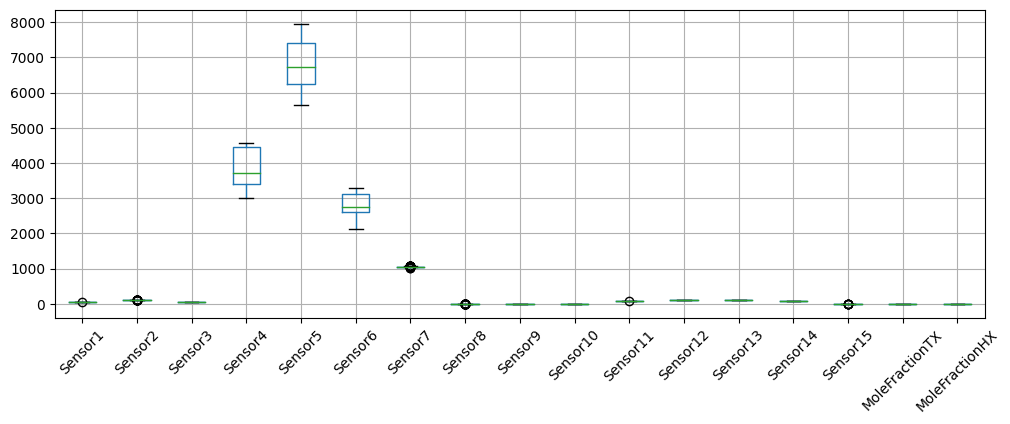

In [9]:
dataset.boxplot(column = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4','Sensor5', 'Sensor6', 'Sensor7',
       'Sensor8','Sensor9','Sensor10', 'Sensor11', 'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'MoleFractionTX','MoleFractionHX'], rot=45, figsize = (12,4));

array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Sensor1'}>,
        <Axes: title={'center': 'Sensor2'}>,
        <Axes: title={'center': 'Sensor3'}>],
       [<Axes: title={'center': 'Sensor4'}>,
        <Axes: title={'center': 'Sensor5'}>,
        <Axes: title={'center': 'Sensor6'}>,
        <Axes: title={'center': 'Sensor7'}>],
       [<Axes: title={'center': 'Sensor8'}>,
        <Axes: title={'center': 'Sensor9'}>,
        <Axes: title={'center': 'Sensor10'}>,
        <Axes: title={'center': 'Sensor11'}>],
       [<Axes: title={'center': 'Sensor12'}>,
        <Axes: title={'center': 'Sensor13'}>,
        <Axes: title={'center': 'Sensor14'}>,
        <Axes: title={'center': 'Sensor15'}>],
       [<Axes: title={'center': 'MoleFractionTX'}>,
        <Axes: title={'center': 'MoleFractionHX'}>, <Axes: >, <Axes: >]],
      dtype=object)

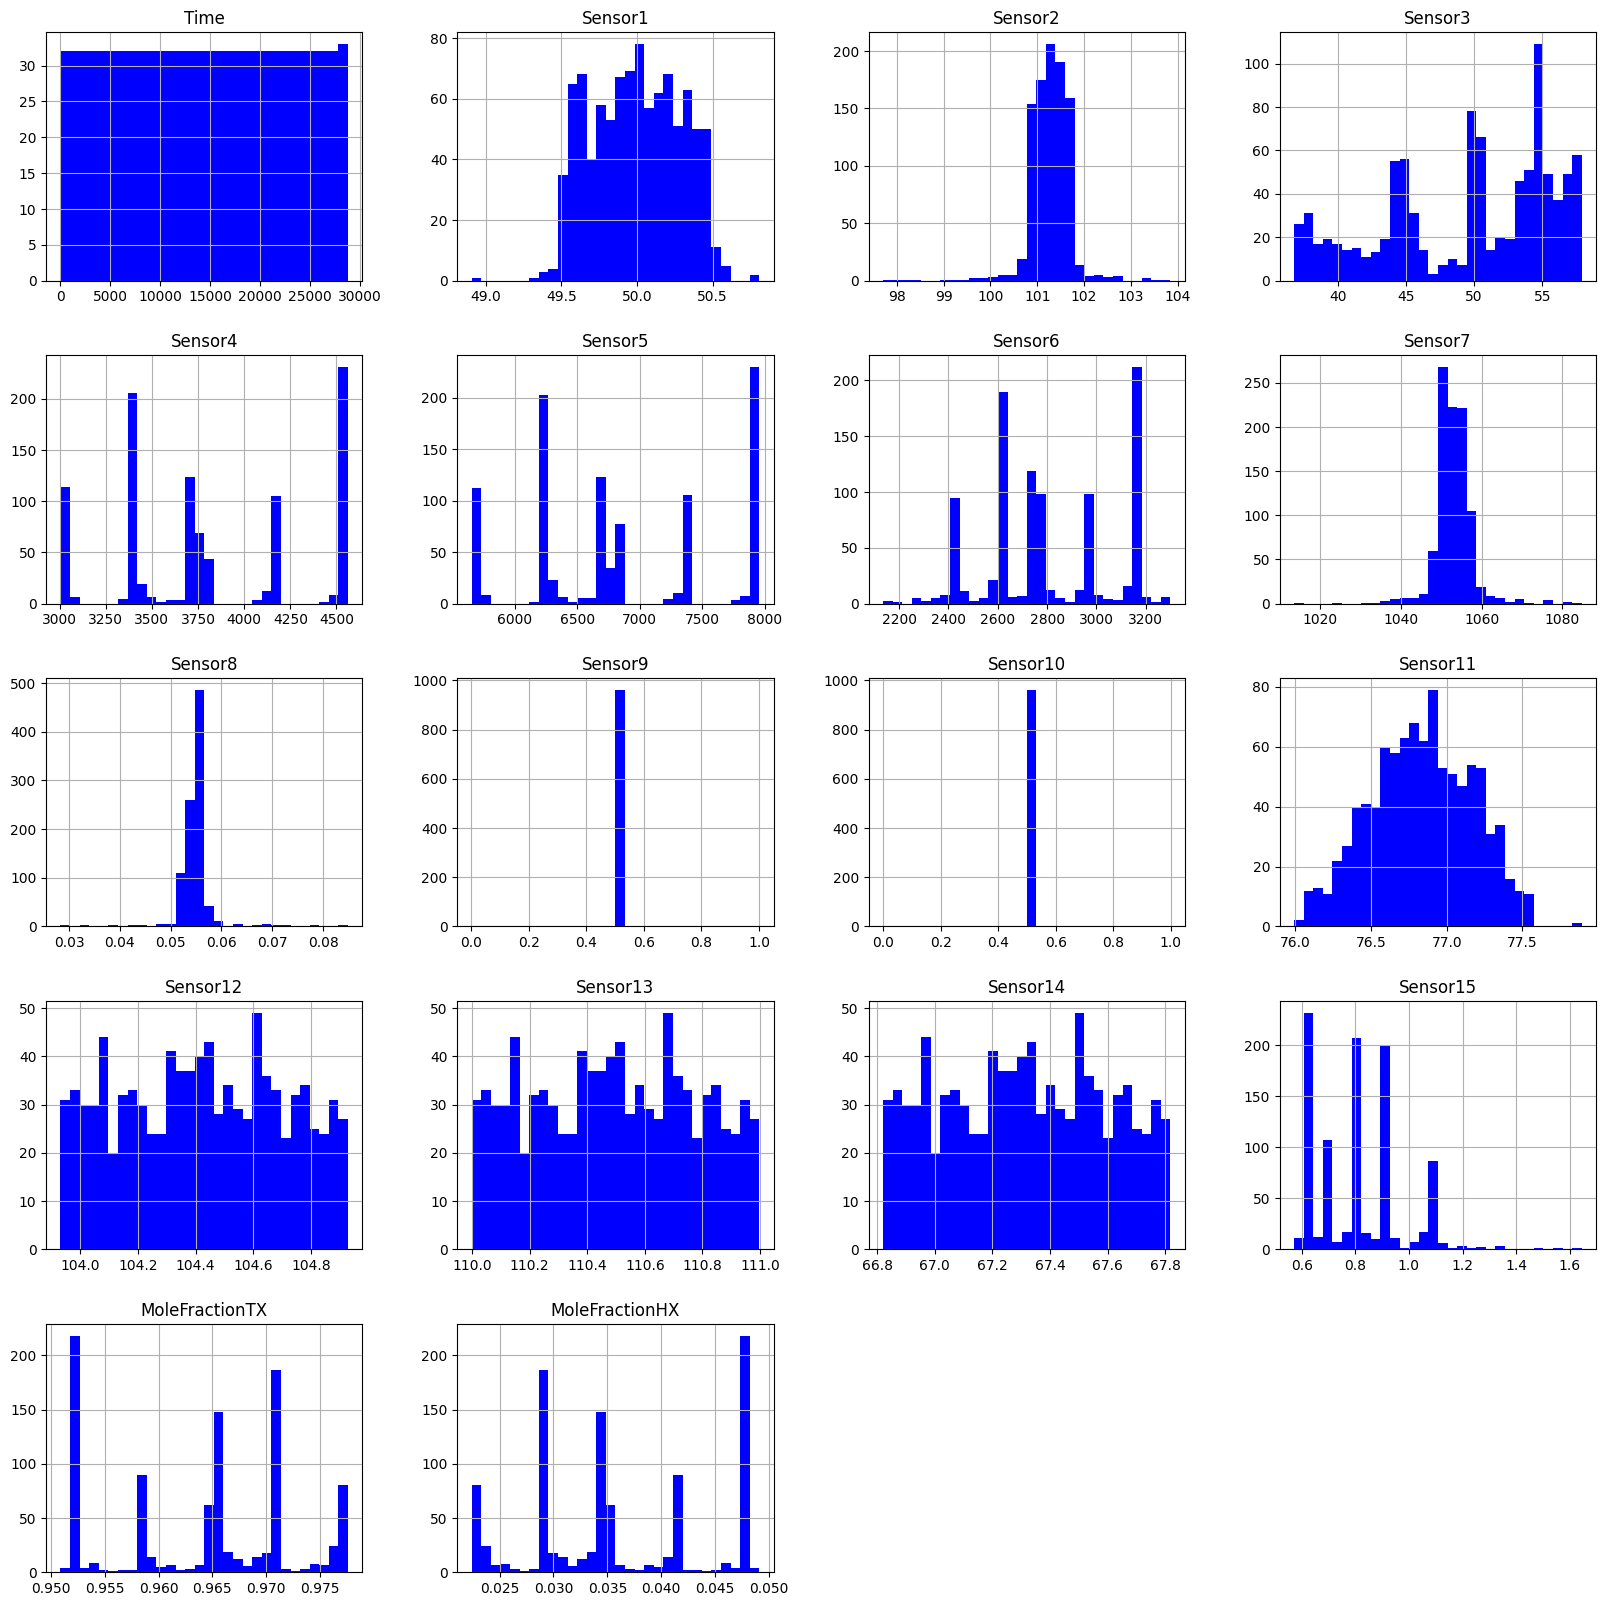

In [10]:
dataset.hist(bins = 30, figsize=(20, 20), color = 'b')

In [11]:
dataset.shape

(961, 18)

In [12]:
#Verificando a presença de colunas com um valor invariável
for col in dataset.columns:
    if len(dataset[col].unique()) == 1:
        print( {col} )

{'Sensor9'}
{'Sensor10'}


In [13]:
#Apagando as colunas
dataset=dataset.drop(['Sensor9'], axis=1)
dataset=dataset.drop(['Sensor10'], axis=1)
dataset.head()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,76.803959,104.148959,110.216959,67.038059,0.798463,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,76.437645,103.977045,110.045045,66.866145,0.800811,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,77.041465,104.608865,110.676865,67.497965,0.803544,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,77.016096,104.609296,110.677296,67.498396,0.807065,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,77.252293,104.864693,110.932693,67.753793,0.811774,0.965784,0.034216


In [15]:
from sklearn.preprocessing import StandardScaler

# Cria uma instância do StandardScaler
scaler = StandardScaler()

# Ajuste os dados
scaled_data = scaler.fit_transform(dataset)


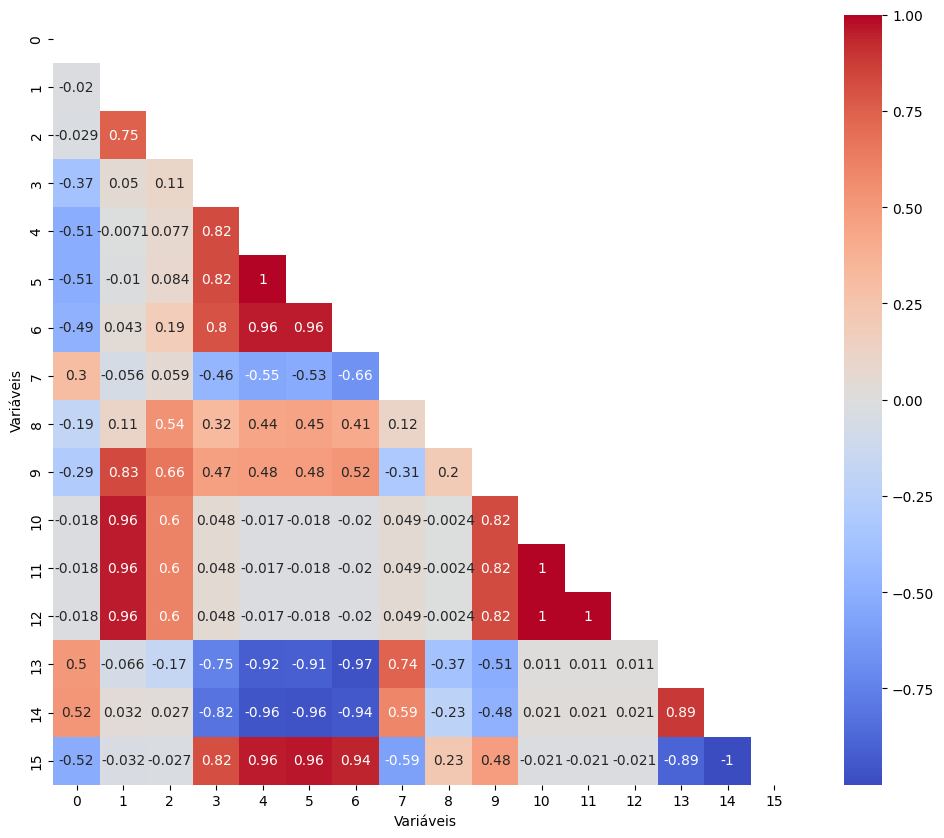

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação usando numpy.corrcoef()
corr_matrix = np.corrcoef(scaled_data, rowvar=False)

# Cria uma máscara para remover a diagonal principal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configura o tamanho da figura
plt.figure(figsize=(12, 10))

# Plota a matriz de correlação usando seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)

# Define os rótulos dos eixos
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')

# Exibe o gráfico
plt.show()



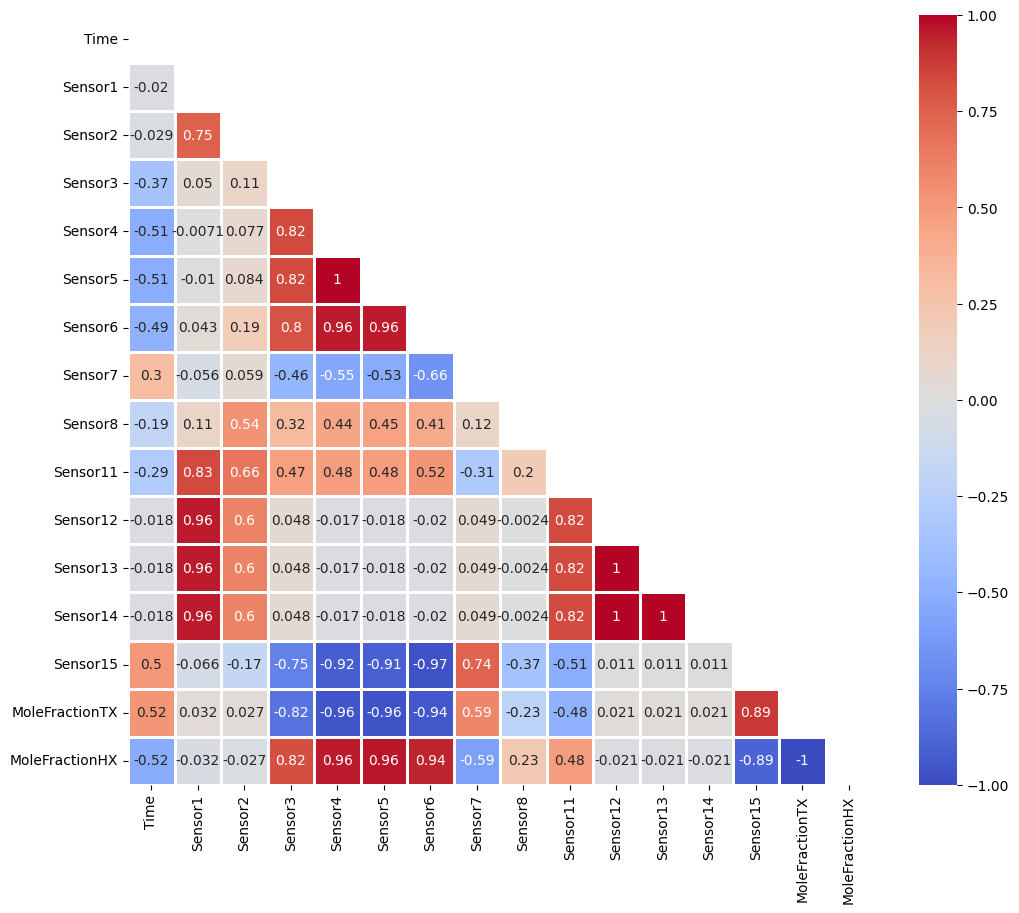

In [17]:
corr = dataset.corr() # Matriz de correlaçao
lower_triangle = np.tril(corr, k = -1)  # seleciona o menor triangula da matriz
mask = lower_triangle == 0 # Apaga a diagonal do mapa de calor, pois a diagonal sempre seré 1
#coolwarm
#rocket
plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask, vmin = -1, vmax = +1)   # mapa de calor
plt.show()

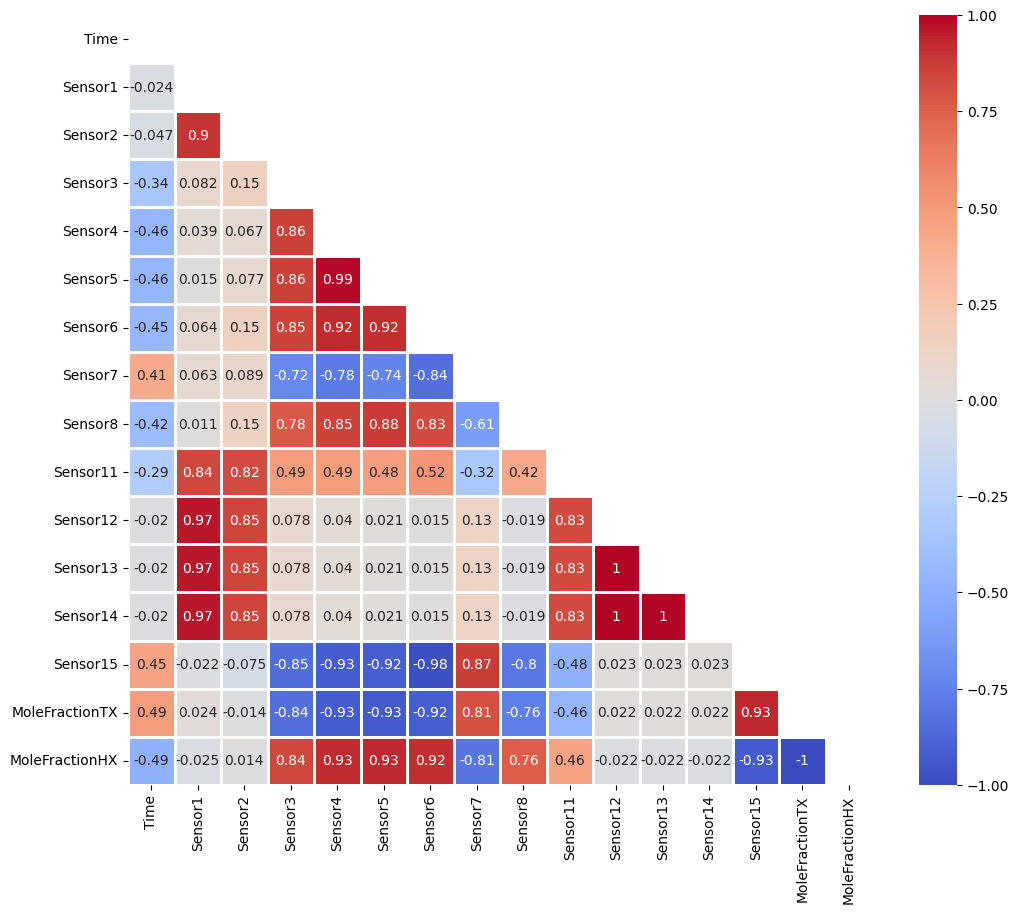

In [18]:
# Método de Spearman
corr = dataset.corr(method='spearman') # Matriz de correlaçao
lower_triangle = np.tril(corr, k = -1)  # seleciona o menor triangula da matriz
mask = lower_triangle == 0 # Apaga a diagonal do mapa de calor, pois a diagonal sempre seré 1
#coolwarm
#rocket
plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask, vmin = -1, vmax = +1)   # mapa de calor
plt.show()

In [ ]:
dataset.corr()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
Time,1.000000,-0.019574,-0.029011,-0.368683,-0.513477,-0.512541,-0.492081,0.302717,-0.187222,-0.294419,-0.018131,-0.018131,-0.018131,0.500055,0.516353,-0.516352
Sensor1,-0.019574,1.000000,0.746864,0.050232,-0.007076,-0.010455,0.042869,-0.056226,0.114151,0.833498,0.958142,0.958142,0.958142,-0.065869,0.031536,-0.031535
Sensor2,-0.029011,0.746864,1.000000,0.105490,0.076542,0.084225,0.186376,0.058721,0.535252,0.659595,0.603224,0.603224,0.603224,-0.170118,0.026545,-0.026544
Sensor3,-0.368683,0.050232,0.105490,1.000000,0.822167,0.823246,0.799410,-0.460723,0.317811,0.465501,0.048020,0.048020,0.048020,-0.745673,-0.815105,0.815104
Sensor4,-0.513477,-0.007076,0.076542,0.822167,1.000000,0.998642,0.959892,-0.552521,0.441386,0.479340,-0.017119,-0.017119,-0.017119,-0.916069,-0.959240,0.959240
Sensor5,-0.512541,-0.010455,0.084225,0.823246,0.998642,1.000000,0.959797,-0.529631,0.448470,0.480445,-0.018120,-0.018120,-0.018120,-0.911593,-0.961166,0.961166
Sensor6,-0.492081,0.042869,0.186376,0.799410,0.959892,0.959797,1.000000,-0.662790,0.409924,0.518584,-0.020238,-0.020238,-0.020238,-0.969132,-0.941967,0.941967
Sensor7,0.302717,-0.056226,0.058721,-0.460723,-0.552521,-0.529631,-0.662790,1.000000,0.117106,-0.313934,0.049303,0.049303,0.049303,0.738440,0.590367,-0.590366
Sensor8,-0.187222,0.114151,0.535252,0.317811,0.441386,0.448470,0.409924,0.117106,1.000000,0.202800,-0.002392,-0.002392,-0.002392,-0.369369,-0.226468,0.226469
Sensor11,-0.294419,0.833498,0.659595,0.465501,0.479340,0.480445,0.518584,-0.313934,0.202800,1.000000,0.824889,0.824889,0.824889,-0.513030,-0.481795,0.481795


In [19]:
dataset.corr(method='spearman')

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
Time,1.000000,-0.024289,-0.046623,-0.343306,-0.457735,-0.456607,-0.451077,0.413733,-0.419861,-0.286441,-0.019635,-0.019635,-0.019635,0.451648,0.487533,-0.487452
Sensor1,-0.024289,1.000000,0.900155,0.082097,0.039499,0.015205,0.063999,0.063478,0.010727,0.842730,0.966078,0.966078,0.966078,-0.021609,0.024366,-0.024596
Sensor2,-0.046623,0.900155,1.000000,0.151414,0.067220,0.077078,0.148756,0.089119,0.147867,0.821642,0.847218,0.847218,0.847218,-0.074861,-0.014243,0.014017
Sensor3,-0.343306,0.082097,0.151414,1.000000,0.861137,0.862071,0.853816,-0.715597,0.776660,0.491402,0.078316,0.078316,0.078316,-0.845244,-0.843492,0.843204
Sensor4,-0.457735,0.039499,0.067220,0.861137,1.000000,0.985292,0.922779,-0.783552,0.852822,0.488201,0.040330,0.040330,0.040330,-0.929094,-0.929167,0.929099
Sensor5,-0.456607,0.015205,0.077078,0.862071,0.985292,1.000000,0.918036,-0.742012,0.875267,0.479280,0.021170,0.021170,0.021170,-0.917005,-0.933681,0.933594
Sensor6,-0.451077,0.063999,0.148756,0.853816,0.922779,0.918036,1.000000,-0.841179,0.834517,0.523024,0.015243,0.015243,0.015243,-0.981010,-0.921482,0.921440
Sensor7,0.413733,0.063478,0.089119,-0.715597,-0.783552,-0.742012,-0.841179,1.000000,-0.610179,-0.321851,0.125782,0.125782,0.125782,0.873839,0.811472,-0.811481
Sensor8,-0.419861,0.010727,0.147867,0.776660,0.852822,0.875267,0.834517,-0.610179,1.000000,0.415676,-0.018749,-0.018749,-0.018749,-0.798954,-0.762389,0.762237
Sensor11,-0.286441,0.842730,0.821642,0.491402,0.488201,0.479280,0.523024,-0.321851,0.415676,1.000000,0.831989,0.831989,0.831989,-0.479707,-0.457872,0.457610


In [20]:
#Dados utilizados para teste e treino do modelo com base nas matrizes de confusão
Colunas=dataset[["Sensor3","Sensor4","Sensor7","Sensor8","Sensor15","MoleFractionTX"]]

In [21]:
X = Colunas.drop('MoleFractionTX',axis=1)
y = Colunas['MoleFractionTX']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Cálculos de erros

In [23]:
def calcular_mae(y, y_pred):
  erro = y - y_pred
  erro_absoluto = np.absolute(erro)
  return erro_absoluto.mean()
def calcular_mse(y, y_pred):
  erro = y - y_pred
  erro_quadratico = erro ** 2
  return erro_quadratico.mean()

## Modelo Linear

In [24]:
from sklearn.linear_model import LinearRegression
modelo_linear = LinearRegression()
modelo_linear

modelo_linear.fit(X_train, y_train)
modelo_linear

LinearRegression()

In [25]:
modelo_linear.score(X_train, y_train)

0.9750166077644696

In [26]:
y_pred_train = modelo_linear.predict(X_train)
y_pred_test = modelo_linear.predict(X_test)

In [27]:
# Cálculo de MAE
mae_train = calcular_mae(y_train, y_pred_train)
mae_test = calcular_mae(y_test, y_pred_test)
print("MAE treino:", mae_train)
print("MAE teste:", mae_test)

MAE treino: 0.000701921243097485
MAE teste: 0.000784983775106404


In [28]:
# Cálculo de MSE
mse_train = calcular_mse(y_train, y_pred_train)
mse_test = calcular_mse(y_test, y_pred_test)
print("Estatística para o Modelo LiNEAR","\n")
print("Score de Treino:", modelo_linear.score(X_train, y_train),"\n")
print("Score de Teste:", modelo_linear.score(X_test, y_test),"\n")
print("MSE treino:", mse_train,"\n")
print("MSE teste:", mse_test,"\n")

Estatística para o Modelo LiNEAR 

Score de Treino: 0.9750166077644696 

Score de Teste: 0.962515251032779 

MSE treino: 1.7779977868012982e-06 

MSE teste: 2.7267179427174104e-06 



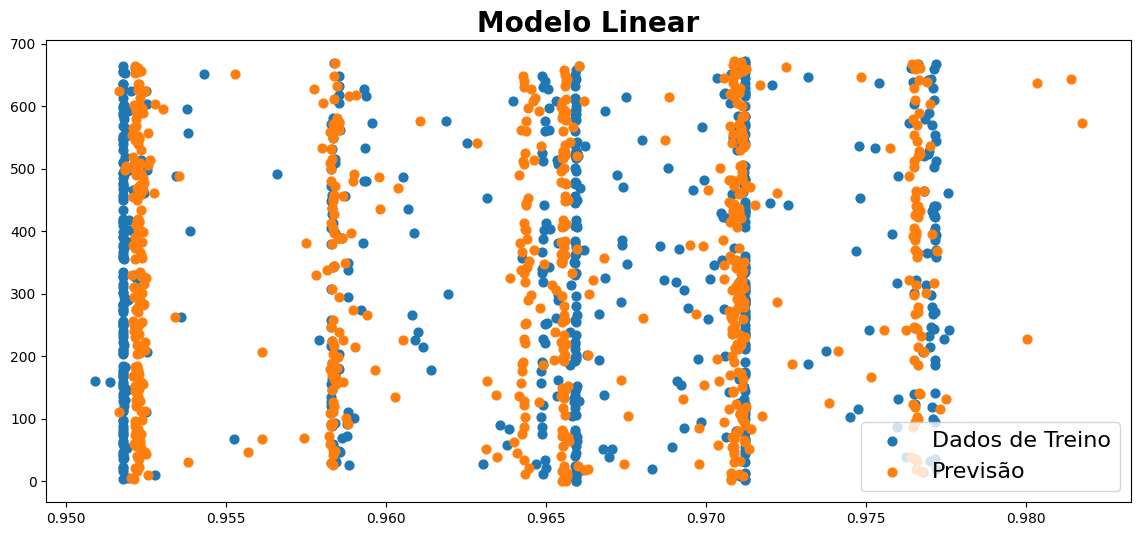

In [29]:
fig, variav=plt.subplots(figsize=(14,6))
leituras = np.linspace(0, len(y_train), len(y_train))
variav.scatter(np.asarray(y_train).reshape(-1),leituras,label='Dados de Treino',s=40);
variav.scatter(np.asarray(y_pred_train).reshape(-1),leituras,label='Previsão',s=40);

plt.legend(fontsize=16, frameon=True, framealpha=0.8, facecolor='white');
variav.set_title('Modelo Linear', fontsize=20, fontweight='bold');

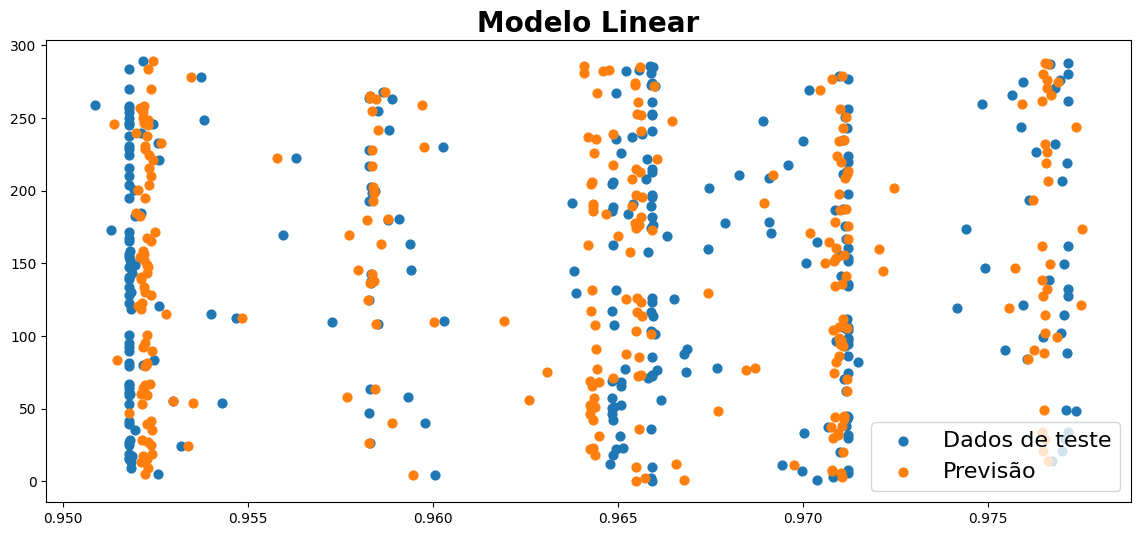

In [30]:
fig, variav=plt.subplots(figsize=(14,6))
leituras = np.linspace(0, len(y_test), len(y_test))
variav.scatter(np.asarray(y_test).reshape(-1),leituras,label='Dados de teste',s=40);
variav.scatter(np.asarray(y_pred_test).reshape(-1),leituras,label='Previsão',s=40);

plt.legend(fontsize=16, frameon=True, framealpha=0.8, facecolor='white');
variav.set_title('Modelo Linear', fontsize=20, fontweight='bold');

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
predictions = model.predict(X_test)
print(predictions)

[0.96548346 0.96678353 0.96574493 0.97105838 0.95945568 0.95223645
 0.97103115 0.97078354 0.97079252 0.95229636 0.96549792 0.96977701
 0.96659055 0.95211726 0.97663456 0.95228272 0.95226331 0.95216175
 0.96438946 0.95240807 0.97107957 0.97649468 0.96426637 0.96432462
 0.9534008  0.95238525 0.95828656 0.95229419 0.95213108 0.97655812
 0.97080975 0.96450587 0.97095829 0.97094632 0.97646703 0.95241606
 0.9655801  0.97075896 0.97107725 0.95228794 0.95890312 0.95238663
 0.9643353  0.97111562 0.9708749  0.97110756 0.96425747 0.951799
 0.96771599 0.97651675 0.9642824  0.96438595 0.96424169 0.95214808
 0.95352977 0.9529821  0.96259088 0.96436202 0.95768358 0.95227005
 0.95212545 0.95220902 0.97119702 0.95843745 0.95217851 0.96432005
 0.95221525 0.9523562  0.96448836 0.96425996 0.97119557 0.96488807
 0.96555632 0.96563786 0.97085071 0.96309761 0.96846511 0.96444728
 0.96872562 0.95222532 0.95224602 0.95228281 0.97089042 0.95146953
 0.97609326 0.96557218 0.97097906 0.96521995 0.97651221 0.952401

## Árvore de decisão

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
modelo_arvore = DecisionTreeRegressor()
modelo_arvore.fit(X_train, y_train)
train_score = modelo_arvore.score(X_train, y_train)
test_score = modelo_arvore.score(X_test, y_test)

print("Score treino:", train_score)
print("Score teste:", test_score)


Score treino: 1.0
Score teste: 0.9876203143377487


In [35]:
y_pred_train_a = modelo_arvore.predict(X_train)
y_pred_test_a = modelo_arvore.predict(X_test)

In [36]:
# Cálculo de MSE
mse_train = calcular_mse(y_train, y_pred_train)
mse_test = calcular_mse(y_test, y_pred_test)
print("Estatística para o Modelo Arvore de decisão","\n")
print("Score de Treino:", modelo_arvore.score(X_train, y_train),"\n")
print("Score de Teste:", modelo_arvore.score(X_test, y_test),"\n")
print("MSE treino:", mse_train,"\n")
print("MSE teste:", mse_test,"\n")

Estatística para o Modelo Arvore de decisão 

Score de Treino: 1.0 

Score de Teste: 0.9876203143377487 

MSE treino: 1.7779977868012982e-06 

MSE teste: 2.7267179427174104e-06 



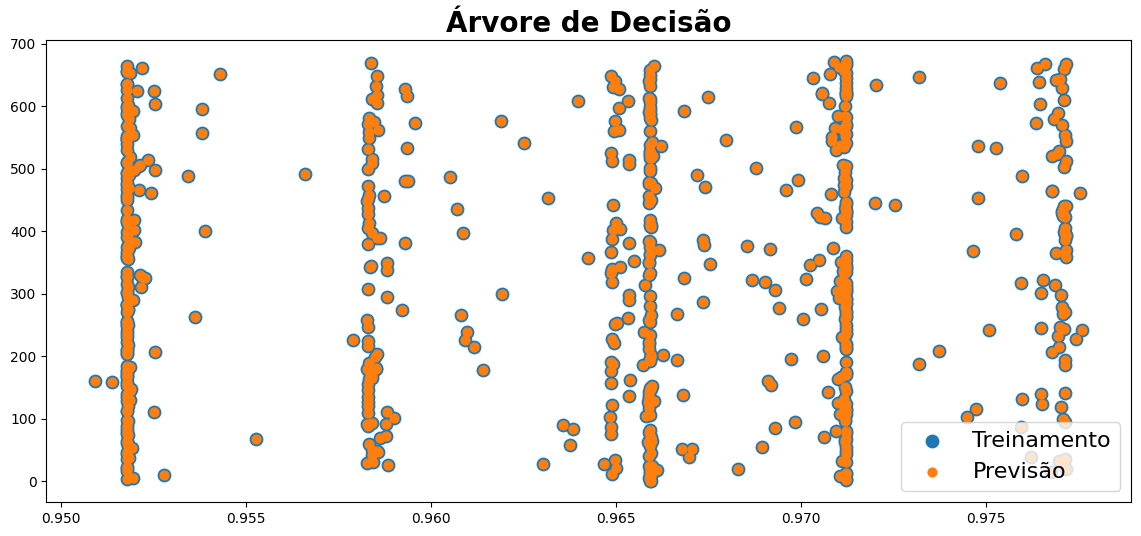

In [37]:
fig, variav=plt.subplots(figsize=(14,6))
leituras = np.linspace(0, len(y_train), len(y_train))
variav.scatter(np.asarray(y_train).reshape(-1),leituras,label='Treinamento',s=80);
variav.scatter(np.asarray(y_pred_train_a).reshape(-1),leituras,label='Previsão',s=40);

plt.legend(fontsize=16, frameon=True, framealpha=0.8, facecolor='white');
variav.set_title('Árvore de Decisão', fontsize=20, fontweight='bold');

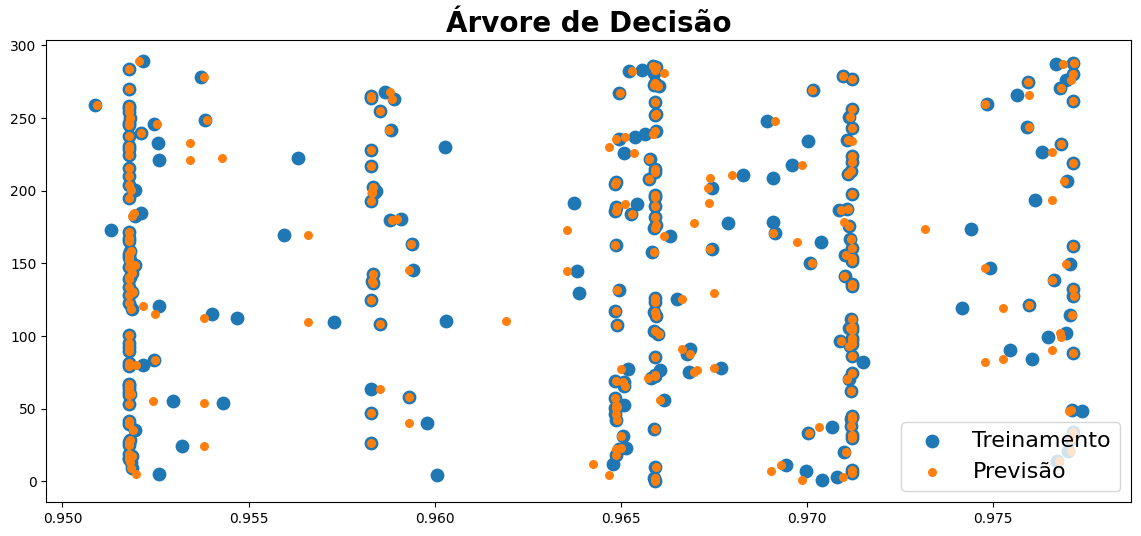

In [38]:
fig, variav=plt.subplots(figsize=(14,6))
leituras = np.linspace(0, len(y_test), len(y_test))
variav.scatter(np.asarray(y_test).reshape(-1),leituras,label='Treinamento',s=80);
variav.scatter(np.asarray(y_pred_test_a).reshape(-1),leituras,label='Previsão',s=30);

plt.legend(fontsize=16, frameon=True, framealpha=0.8, facecolor='white');
variav.set_title('Árvore de Decisão', fontsize=20, fontweight='bold');